In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('DATABEFOREPERCENTILE.csv')

In [3]:
data.drop(columns=['Unnamed: 0'], inplace = True)

RMSE: 36298325432.11209
MAPE: 9.30010764537485
MAD: 35221403923.198204


/Users/sahilbhardwaj/Desktop/UCL/Programming/Anaconda/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/sahilbhardwaj/Desktop/UCL/Programming/Anaconda/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/sahilbhardwaj/Desktop/UCL/Programming/Anaconda/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/sahilbhardwaj/Desktop/UCL/Programming/Anaconda/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting pa

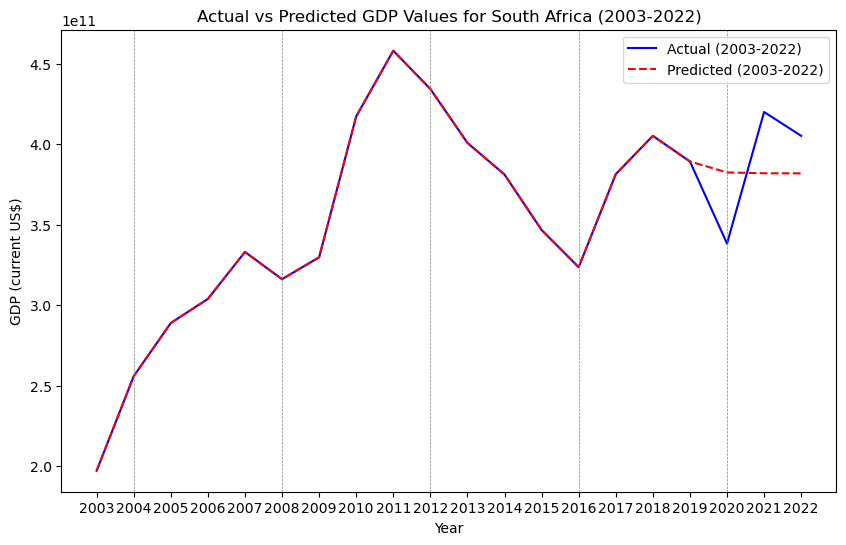

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


south_africa_data = data[data['Country Name'] == 'South Africa']
south_africa_gdp = south_africa_data['GDP (current US$)']

train_data = south_africa_gdp.loc[:'2019']
test_data = south_africa_gdp.loc['2020':'2022']

model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=3)

rmse = np.sqrt(mean_squared_error(test_data, forecast))
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
mad = mean_absolute_error(test_data, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"MAD: {mad}")

actual_values = south_africa_gdp.loc['2003':'2022']
combined_values = np.concatenate((south_africa_gdp.loc['2003':'2019'], forecast))

years_all = list(range(2003, 2023))

plt.figure(figsize=(10, 6))
plt.plot(years_all[:len(actual_values)], actual_values, label='Actual (2003-2022)', color='blue')
plt.plot(years_all, combined_values, label='Predicted (2003-2022)', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.title('Actual vs Predicted GDP Values for South Africa (2003-2022)')
plt.legend()

plt.xticks(np.arange(2003, 2023, 1))

for year in range(2004, 2023, 4):
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=0.5)

plt.show()
